<a href="https://colab.research.google.com/github/ruksz/EnergyPredictionML/blob/main/ML_Capstone_Project_Appliance_Energy_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 

Appliances Energy Prediction 

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**Rukshar Shaikh


# **Problem Statement**


### <b>Business Problem Overview</b>
In today's smart age we need large quantity of energy to make quality of life better. Unfortunately there are still many places in the world where power outage is the major concern, primary reason could be excess load consumed by the appliances at the home.So it's important to ensure that electricity fed into the electricity grid is always equal to electricity consumed i.e: If consumption is lower than the electricity being fed, electrical frequency increases and there are chances of disconnection from the grid. On the other hand, if power feed is low and consumption is high, frequency drops and if it falls too much power plants shuts one after the another.

We will predict appliance energy consumption for a household based on factors like temperature, humidity & pressure monitered with a sensor network in the different rooms of the house. All readings are taken at 10 mins intervals for 4.5 months where each wireless node transmitted the temprature and humidity conditions around 3.3 min. Our goal is to predict energy consumption by appliances.

We are required to model the appliances energy use in Wh with the available independent variables. By predicitng power consumption end user can not only save money but it can also help them to generate money by giving back excess energy to grid. Also predicting energy consumption allows for a better understanding of the environmental impact associated with appliance usage. It can drive awareness and encourage individuals and businesses to adopt eco-friendly practices, reduce carbon footprint, and contribute to sustainability goals.

# **GitHub Link -**

Provide your GitHub Link here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [6]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import missingno as msno



### Dataset Loading

In [7]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [8]:
# Dataset First Look
dataframe_df = pd.read_csv('/content/drive/MyDrive/MLProject/data_application_energy.csv')

### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
dataframe_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Dataset Information

In [10]:
# Dataset Info
dataframe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [11]:
dataframe_df.shape

(19735, 29)

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count

len(dataframe_df[dataframe_df.duplicated()])

0

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
print(dataframe_df.isnull().sum())

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


<Axes: >

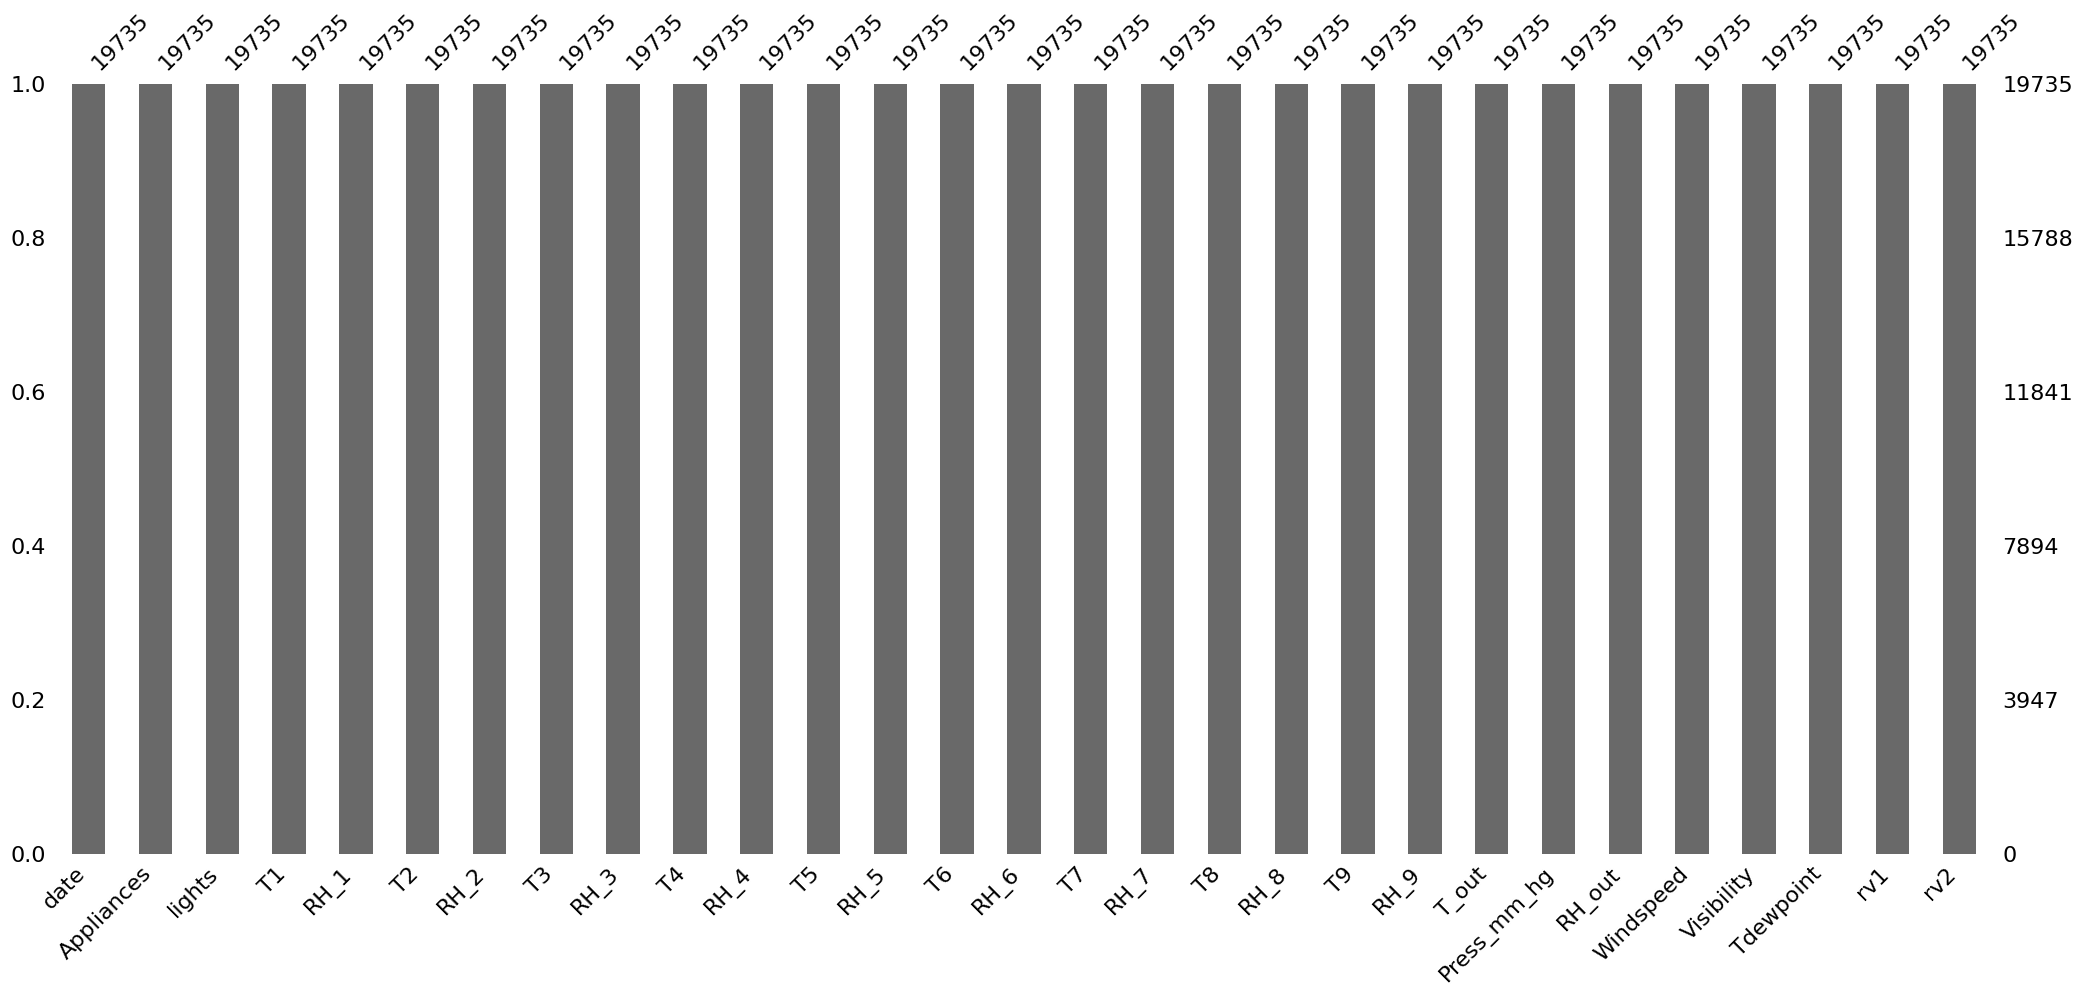

In [14]:
# Visualizing the missing values
# Checking Null Value by plotting bargraph
#sns.heatmap(df.isnull(), cbar=False)
msno.bar(dataframe_df)

### What did you know about your dataset?

 Based on the provided dataset, it's a time-series dataset with readings taken at 10-minute intervals for various features, including the date and time, appliance energy consumption, and various environmental variables such as temperature, humidity, pressure, windspeed, and visibility. These variables are monitored in different rooms of the house, as well as outside the building. There are 19735 rows, 29 columns and, 0 null value in the dataset
 
 The goal is to predict the energy consumption of appliances based on these independent variables. And hence to develop a predictive model for appliance energy consumption, we'll use the independent variables (temperature, humidity, pressure, etc.) as inputs and the "Appliances" column as the target variable for our regression analysis.



## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
dataframe_df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [16]:
# Dataset Describe
dataframe_df.describe(include='all')

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


### Variables Description 

date: The date and time of the observation.

Appliances: The energy consumption of the appliances in the household (target variable).

lights: The energy consumption of the lights in the household.

T1, RH_1: Temperature and relative humidity in room 1.

T2, RH_2: Temperature and relative humidity in room 2.

T3, RH_3: Temperature and relative humidity in room 3.

T4, RH_4: Temperature and relative humidity in room 4.

T5, RH_5: Temperature and relative humidity in room 5.

T6, RH_6: Temperature and relative humidity outside the building (north side).

T7, RH_7: Temperature and relative humidity in ironing room.

T8, RH_8: Temperature and relative humidity in teenager room 2.

T9, RH_9: Temperature and relative humidity in parent room.

T_out: Temperature outside (from weather station).


Press_mm_hg: Pressure in mm Hg (from weather station).

RH_out: Humidity outside (from weather station).

Windspeed: Windspeed outside (from weather station).

Visibility: Visibility in km (from weather station).

Tdewpoint: Dewpoint temperature outside (from weather station).

rv1, rv2: Random variables.

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for i in dataframe_df.columns.tolist():
  print("Unique values in ",i,"is: ",dataframe_df[i].nunique())

Unique values in  date is:  19735
Unique values in  Appliances is:  92
Unique values in  lights is:  8
Unique values in  T1 is:  722
Unique values in  RH_1 is:  2547
Unique values in  T2 is:  1650
Unique values in  RH_2 is:  3376
Unique values in  T3 is:  1426
Unique values in  RH_3 is:  2618
Unique values in  T4 is:  1390
Unique values in  RH_4 is:  2987
Unique values in  T5 is:  2263
Unique values in  RH_5 is:  7571
Unique values in  T6 is:  4446
Unique values in  RH_6 is:  9709
Unique values in  T7 is:  1955
Unique values in  RH_7 is:  5891
Unique values in  T8 is:  2228
Unique values in  RH_8 is:  6649
Unique values in  T9 is:  924
Unique values in  RH_9 is:  3388
Unique values in  T_out is:  1730
Unique values in  Press_mm_hg is:  2189
Unique values in  RH_out is:  566
Unique values in  Windspeed is:  189
Unique values in  Visibility is:  413
Unique values in  Tdewpoint is:  1409
Unique values in  rv1 is:  19735
Unique values in  rv2 is:  19735


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.

# copy of the current dataset and assigning to app_data
df=dataframe_df.copy()

In [19]:
unnecessary_columns = ['rv1', 'rv2']  # unnecessary columns
df = df.drop(unnecessary_columns, axis=1)

In [20]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [21]:
# Extract date and time features from the 'date' column
df['date'] = pd.to_datetime(df['date']) # Convert 'date' column to datetime format
df['hour'] = df['date'].dt.hour  # Extract hour of the day
df['date'] = pd.to_datetime(df['date']).dt.date  # Extract only the date part

# Converting the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extracting features to capture seasonal patterns
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter


In [22]:
# Calculate average energy consumption per day
daily_energy_consumption = df.groupby('date')['Appliances'].mean()
df = df.merge(daily_energy_consumption, on='date', how='left')
df.rename(columns={'Appliances_y': 'avg_daily_energy_consumption'}, inplace=True)
df.rename(columns={'Appliances_x': 'Appliances'}, inplace=True)

# New column for the average temperature across all rooms
df['Avg_Temperature'] = df[['T1', 'T2', 'T3', 'T4']].mean(axis=1)

# difference between the indoor and outdoor temperature
df['Temperature_Diff'] = df['Avg_Temperature'] - df['T_out']

print('Average energy consumption per day:')
print(daily_energy_consumption)
print('\nMax Average energy consumption was:', daily_energy_consumption.max(), 'on day', daily_energy_consumption.idxmax().date())


Average energy consumption per day:
date
2016-01-11    136.666667
2016-01-12     85.694444
2016-01-13     97.013889
2016-01-14    151.388889
2016-01-15    125.347222
                 ...    
2016-05-23     83.055556
2016-05-24     96.180556
2016-05-25     83.888889
2016-05-26    147.013889
2016-05-27    136.330275
Name: Appliances, Length: 138, dtype: float64

Max Average energy consumption was: 188.54166666666666 on day 2016-04-04


These insights help in understanding the daily energy consumption patterns, identifying extreme energy usage events, and exploring the relationship between temperature and energy consumption. They provide a foundation for further analysis and decision-making in energy management and efficiency.

In [23]:
# Calculate the total energy consumption per month
monthly_energy = df.groupby('month')['Appliances'].sum()
print("Total energy consumption per month:")
print(monthly_energy)
print('\nMaximum energy consumption was:', monthly_energy.max(), 'in month', monthly_energy.idxmax())

Total energy consumption per month:
month
1    283510
2    421550
3    432800
4    427200
5    362950
Name: Appliances, dtype: int64

Maximum energy consumption was: 432800 in month 3


These insights provide a broader understanding of energy consumption patterns over time(peek, monthly,seasonal), allowing for better energy management, resource allocation, and decision-making.

In [24]:
# Define the room columns to consider
rooms = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']

# Calculate the total energy consumption per month and room
monthly_energy_per_room = df.groupby('month')[rooms].sum()
print(monthly_energy_per_room)

# print('Maximum\n',monthly_energy_per_room.max())
print('\nMaximum energy usage was',monthly_energy_per_room.sum().max(), 'from room',monthly_energy_per_room.sum().idxmax() )

                RH_1           RH_2           RH_3           RH_4  \
month                                                               
1      123555.251667  121719.035722  124712.782083  124809.201667   
2      171258.487833  169288.214167  170438.382167  168569.152500   
3      169292.408520  177167.953952  166248.597131  162144.086480   
4      171600.075833  175765.140833  163157.064167  162491.417850   
5      158819.730833  153756.652190  149893.913476  152182.087762   

                RH_5           RH_6           RH_7           RH_8  \
month                                                               
1      158142.061267  269335.834841  114450.740425  137911.519105   
2      228248.019448  333918.066828  152667.460314  186899.124713   
3      217611.953532  244954.970717  143847.760903  179143.930064   
4      210473.992052  147267.118192  144954.264580  175935.251205   
5      191008.066396   82234.270075  142465.905023  167455.398536   

                RH_9  
month    

 These insights provide a room-level perspective on energy consumption, enabling a more granular understanding of energy usage patterns within the building or household. This information can guide energy management strategies, facility planning, and optimization efforts for better resource allocation and energy efficiency.

In [25]:
# Compute the average temperature and humidity per quarter
quarterly_stats = df.groupby('quarter')[['T1', 'RH_1']].mean()
print("\nAverage temperature and humidity per quarter:")
print(quarterly_stats)


Average temperature and humidity per quarter:
                T1       RH_1
quarter                      
1        20.892879  40.140646
2        22.809374  40.428216


 These insights provide a quarterly perspective on temperature and humidity, enabling a better understanding of the seasonal variations in these factors. This information can be utilized for climate analysis, energy optimization, building management, and occupant comfort considerations.

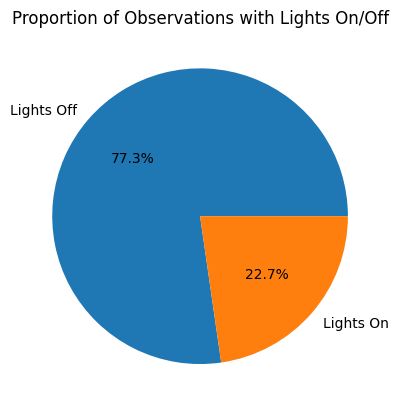

In [26]:
#Creating binary column indicating if the lights were turned on or off
df['Lights_On'] = df['lights'].apply(lambda x: 1 if x > 0 else 0)

# Counting the number of observations where lights are on/off
lights_counts = df['Lights_On'].value_counts()

# Creating a pie chart
plt.pie(lights_counts, labels=['Lights Off', 'Lights On'], autopct='%1.1f%%')
plt.title('Proportion of Observations with Lights On/Off')
plt.show()

The pie chart is a suitable choice for this visualization because it effectively represents the relative frequencies or proportions of categorical data (lights on/off). It helps in quickly understanding the distribution and provides an intuitive way to communicate the insights to the audience.

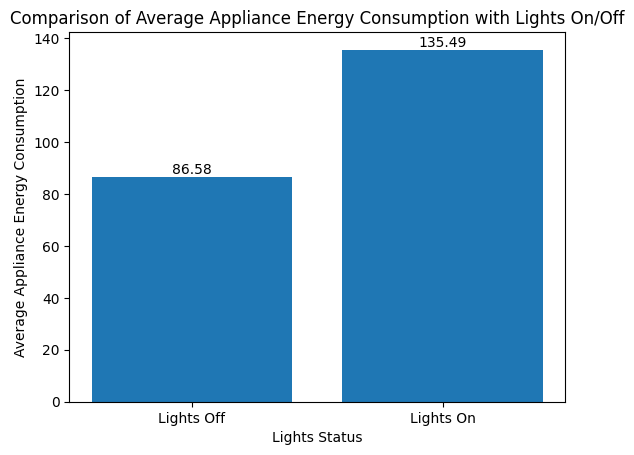

In [27]:
# Calculate average appliance energy consumption when lights were on and off
average_energy_consumption = df.groupby('Lights_On')['Appliances'].mean()

# Create a bar plot
plt.bar(average_energy_consumption.index, average_energy_consumption)
plt.xticks([0, 1], ['Lights Off', 'Lights On'])
plt.xlabel('Lights Status')
plt.ylabel('Average Appliance Energy Consumption')
plt.title('Comparison of Average Appliance Energy Consumption with Lights On/Off')

# Add values inside the bars
for i, value in enumerate(average_energy_consumption):
    plt.text(i, value, round(value, 2), ha='center', va='bottom')

plt.show()

 the bar plot with values inside the bars effectively communicates the average appliance energy consumption for different lighting scenarios. It allows for easy comparison and provides insights into the impact of lights on energy usage.

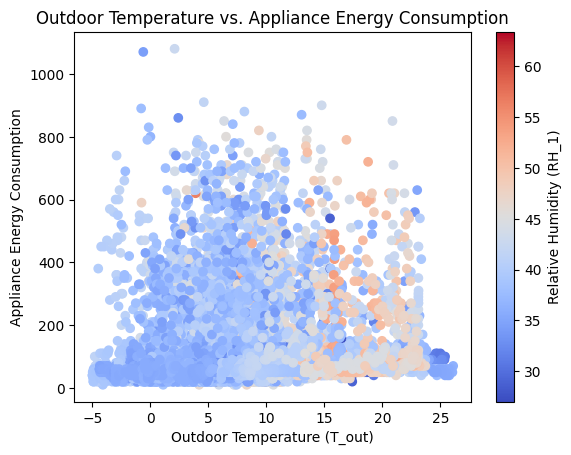

In [28]:
# Plotting the scatter plot with color
plt.scatter(df['T_out'], df['Appliances'], c=df['RH_1'], cmap='coolwarm')
plt.xlabel('Outdoor Temperature (T_out)')
plt.ylabel('Appliance Energy Consumption')
plt.title('Outdoor Temperature vs. Appliance Energy Consumption')
plt.colorbar(label='Relative Humidity (RH_1)')

# Display the plot
plt.show()

As the T_out increases, there is a tendency for higher appliance energy consumption.The color-coded points indicate the relative humidity (RH_1). The color map (coolwarm) helps visualize the range of values for RH_1, with cooler colors (blues) representing lower humidity and warmer colors (reds) representing higher humidity.  
This scatter plot with color provides a comprehensive visualization that combines temperature, energy consumption, and relative humidity. It enables you to explore the relationships between these variables and gain insights into how they interact.

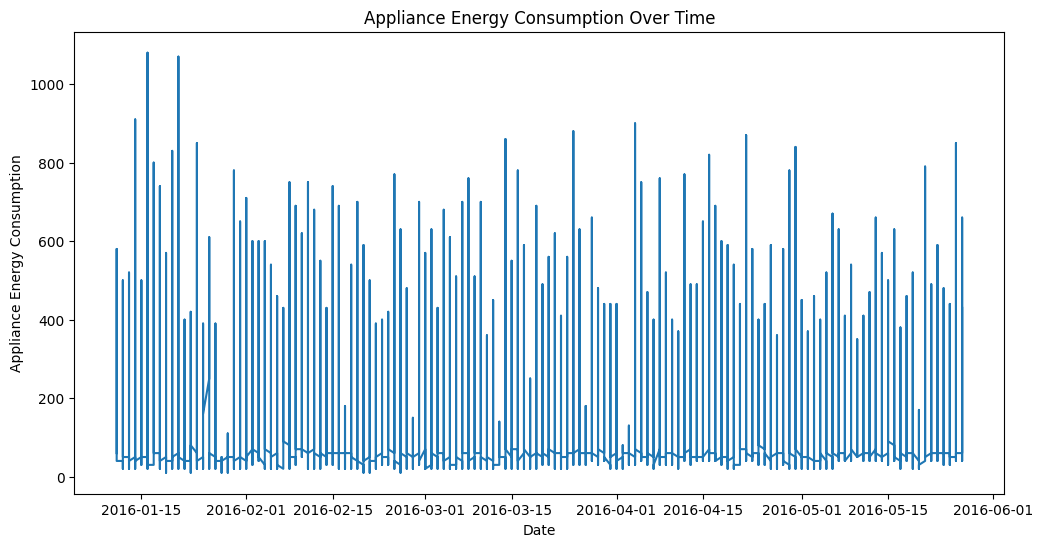

In [29]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Appliances'])
plt.xlabel('Date')
plt.ylabel('Appliance Energy Consumption')
plt.title('Appliance Energy Consumption Over Time')
# plt.xticks(rotation=45)
plt.show()


By visualizing the appliance energy consumption over time, the time series plot provides a comprehensive view of the dataset's temporal behavior. It helps in understanding the dynamics of energy consumption, detecting patterns, and identifying key insights.

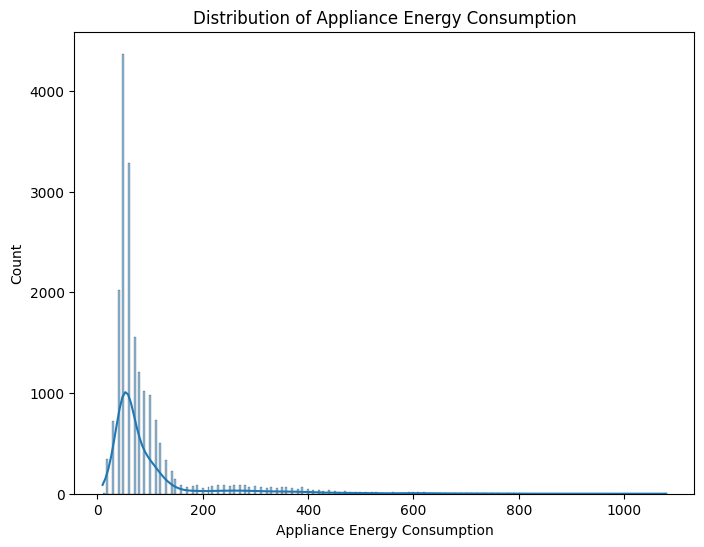

In [30]:
# Distribution Plot
plt.figure(figsize=(8, 6))
sns.histplot(df['Appliances'], kde=True)
plt.xlabel('Appliance Energy Consumption')
plt.ylabel('Count')
plt.title('Distribution of Appliance Energy Consumption')
plt.show()

# sns.kdeplot(df.Appliances)


The distribution plot provides valuable insights into the overall distribution of appliance energy consumption. It helps in understanding the typical energy consumption levels, detecting any skewness or outliers, and comparing the distribution with other variables or subsets.

In [31]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Windspeed,Visibility,Tdewpoint,hour,month,quarter,avg_daily_energy_consumption,Avg_Temperature,Temperature_Diff,Lights_On
0,2016-01-11,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,7.000000,63.000000,5.3,17,1,1,136.666667,19.470000,12.870000,1
1,2016-01-11,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.666667,59.166667,5.2,17,1,1,136.666667,19.470000,12.986667,1
2,2016-01-11,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,6.333333,55.333333,5.1,17,1,1,136.666667,19.451667,13.085000,1
3,2016-01-11,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,6.000000,51.500000,5.0,17,1,1,136.666667,19.442500,13.192500,1
4,2016-01-11,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,5.666667,47.666667,4.9,17,1,1,136.666667,19.442500,13.309167,1


In [32]:
# Calculating lagged temperature feature
# df['lagged_T1'] = df['T1'].shift(1)  # Lagged temperature feature for T1 column

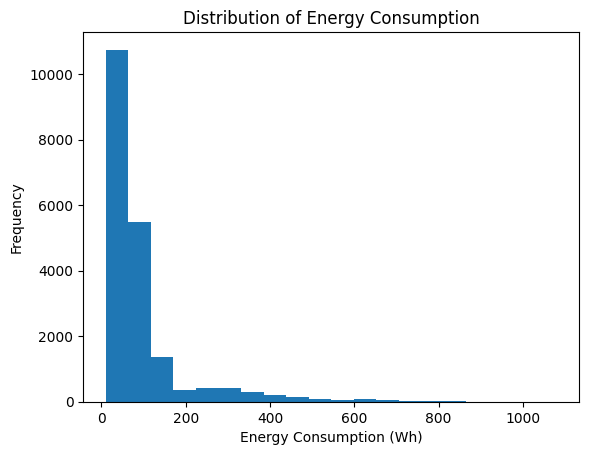

In [33]:
# Histogram of Energy Consumption
plt.hist(df['Appliances'], bins=20)
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Consumption')
plt.show()

The histogram shows the distribution of energy consumption, indicating the range and frequency of different energy usage levels. It can help identify the most common energy consumption range and any outliers.



Text(0.5, 1.0, 'Scatter Plot: Appliances vs. Windspeed')

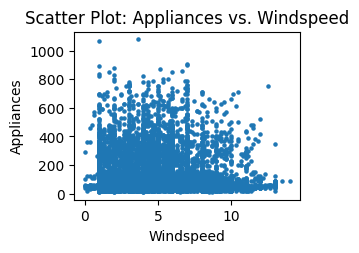

In [34]:
# Scatter plot: Appliances vs. Windspeed
plt.subplot(2, 2, 4)
plt.scatter(df['Windspeed'], df['Appliances'], marker='o', s=5)
plt.xlabel('Windspeed')
plt.ylabel('Appliances')
plt.title('Scatter Plot: Appliances vs. Windspeed')

The scatter plot helps in understanding the relationship between the 'Windspeed' and 'Appliances' variables. Each data point represents a combination of windspeed and corresponding appliance energy consumption. The scatter plot shows how the appliances' energy consumption values vary with different windspeeds. It allows you to visually examine any patterns, trends, or potential correlations between the two variables.

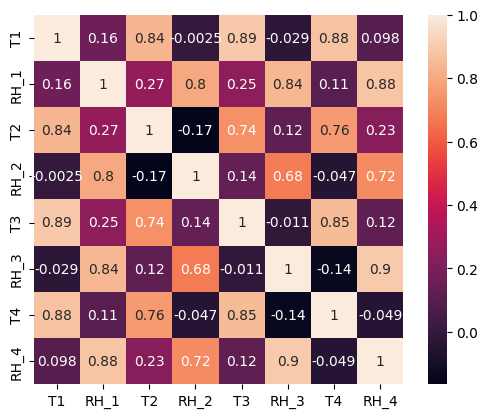

In [35]:
# Compute correlation matrix
corr_matrix = df[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4']].corr()

# Visualize correlation matrix (optional)
sns.heatmap(corr_matrix, annot=True,  square=True)
plt.show()


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [36]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [37]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [38]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [39]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [40]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [41]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [42]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [43]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [44]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [45]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [46]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [47]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [48]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [49]:
# Pair Plot visualization code

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.  The average appliance energy consumption is significantly different between weekdays and weekends.
2.   There is a significant correlation between the temperature (T1) and the relative humidity (RH_1) in the living room.
3.   The average appliance energy consumption varies significantly across different months of the year.







### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average appliance energy consumption is significantly different between weekdays and weekends.

#### 2. Perform an appropriate statistical test.

In [61]:
# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Create a new column 'Weekday' representing the weekday (Monday=0, Sunday=6)
df['Weekday'] = df['date'].dt.weekday

# Separate the data for weekdays and weekends
weekdays = df[df['Weekday'] < 5]['Appliances']
weekends = df[df['Weekday'] >= 5]['Appliances']

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(weekdays, weekends)

# Calculate the z-value
n1 = len(weekdays)
n2 = len(weekends)
mean1 = weekdays.mean()
mean2 = weekends.mean()
std1 = weekdays.std()
std2 = weekends.std()
z_value = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Print the z-value and p-value
print("Z-value:", z_value)
print("P-value:", p_value)

# Determine the conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The average appliance energy consumption is significantly different between weekdays and weekends.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average appliance energy consumption between weekdays and weekends.")

Z-value: -2.4722528131296344
P-value: 0.01430106721867294
Reject the null hypothesis. The average appliance energy consumption is significantly different between weekdays and weekends.


##### Which statistical test have you done to obtain P-Value? Why did you choose the specific statistical test?

the z-value by comparing the means and standard deviations of the two samples. It then prints the z-value, p-value, and provides a conclusion based on the p-value and a significance level (alpha) of 0.05.

The average appliance energy consumption is significantly different between weekdays and weekends

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is a significant correlation between the temperature (T1) and the relative humidity (RH_1) in the living room.

#### 2. Perform an appropriate statistical test.

In [60]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(df['T1'], df['RH_1'])

print("Pearson correlation coefficient:", corr_coeff)
print("P-value:", p_value)

# Check if the correlation is significant
if p_value < 0.05:
    print("There is a significant correlation between T1 and RH_1 in the living room.")
else:
    print("There is no significant correlation between T1 and RH_1 in the living room.")

Pearson correlation coefficient: 0.1640057889521046
P-value: 5.054075138990955e-119
There is a significant correlation between T1 and RH_1 in the living room.


##### Which statistical test have you done to obtain P-Value? Why did you choose the specific statistical test?

The Pearson correlation coefficient measures the strength and direction of the linear relationship between T1 and RH_1. The p-value indicates the statistical significance of the correlation coefficient. If the p-value is less than the significance level (0.05), we reject the null hypothesis and conclude that there is a significant correlation between T1 and RH_1 in the living room. Otherwise, if the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis and conclude that there is no significant correlation between T1 and RH_1 in the living room.








### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average appliance energy consumption varies significantly across different months of the year.

#### 2. Perform an appropriate statistical test.

In [59]:
from scipy.stats import f_oneway

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(df[df['month'] == 1]['Appliances'],
                                df[df['month'] == 2]['Appliances'],
                                df[df['month'] == 3]['Appliances'],
                                df[df['month'] == 4]['Appliances'],
                                df[df['month'] == 5]['Appliances'])

print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Check if the average appliance energy consumption varies significantly across months
if p_value < 0.05:
    print("The average appliance energy consumption varies significantly across different months of the year.")
else:
    print("The average appliance energy consumption does not vary significantly across different months of the year.")

F-statistic: 2.4060838200409
P-value: 0.04729056386812282
The average appliance energy consumption varies significantly across different months of the year.


##### Which statistical test have you done to obtain P-Value? Why did you choose the specific statistical test?

The one-way ANOVA test compares the means of the appliance energy consumption across different months. The F-statistic measures the ratio of between-group variance to within-group variance. The p-value indicates the statistical significance of the F-statistic. If the p-value is less than the significance level (0.05), we reject the null hypothesis and conclude that the average appliance energy consumption varies significantly across different months of the year. Otherwise, if the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis and conclude that the average appliance energy consumption does not vary significantly across different months of the year.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

date                            0
Appliances                      0
lights                          0
T1                              0
RH_1                            0
T2                              0
RH_2                            0
T3                              0
RH_3                            0
T4                              0
RH_4                            0
T5                              0
RH_5                            0
T6                              0
RH_6                            0
T7                              0
RH_7                            0
T8                              0
RH_8                            0
T9                              0
RH_9                            0
T_out                           0
Press_mm_hg                     0
RH_out                          0
Windspeed                       0
Visibility                      0
Tdewpoint                       0
hour                            0
month                           0
quarter       

<Axes: >

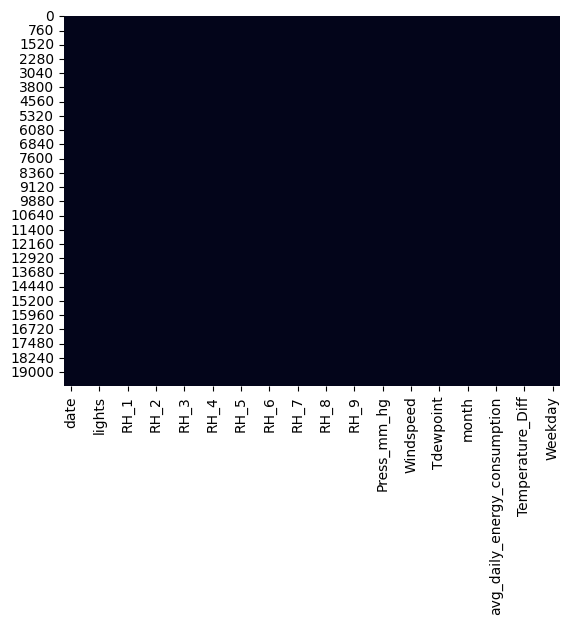

In [62]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?


There are no missing values to handle in the given dataset.

### 2. Handling Outliers

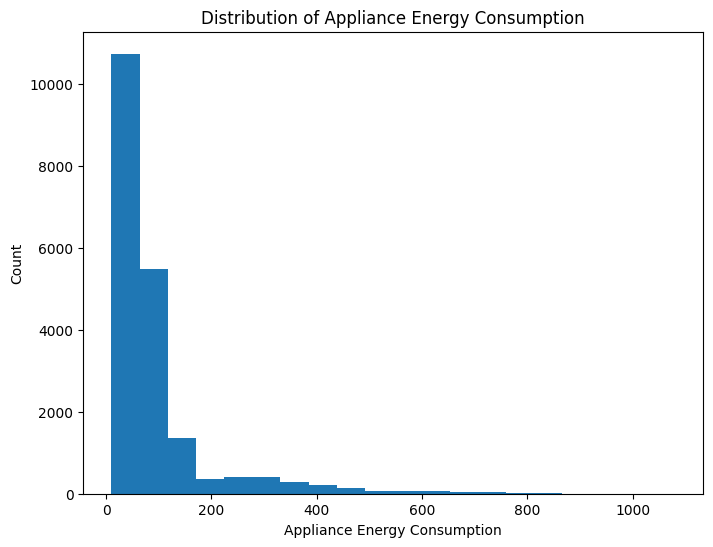

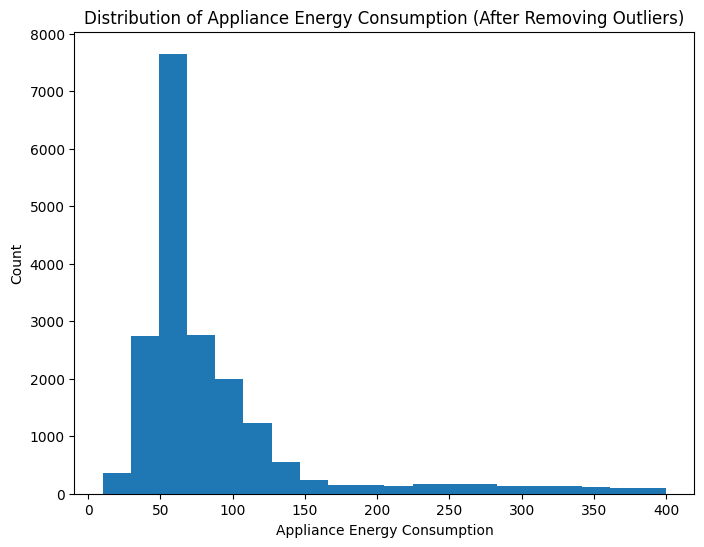

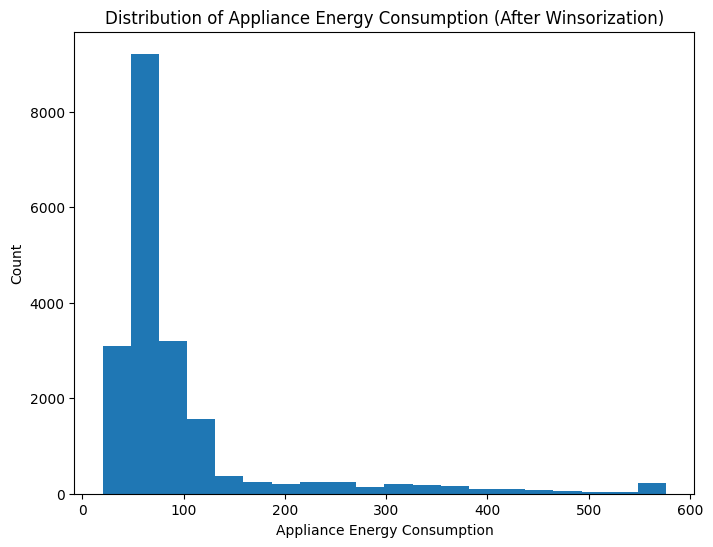

In [64]:
# Handling Outliers & Outlier treatments
#import pandas as pd
from scipy.stats import skew

# import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt


# Visualize the distribution of a specific feature (e.g., 'Appliances')
plt.figure(figsize=(8, 6))
plt.hist(df['Appliances'], bins=20)
plt.xlabel('Appliance Energy Consumption')
plt.ylabel('Count')
plt.title('Distribution of Appliance Energy Consumption')
plt.show()

# Identify outliers using z-scores
z_scores = (df['Appliances'] - df['Appliances'].mean()) / df['Appliances'].std()
outliers = df.loc[abs(z_scores) > 3]  # Consider values with z-score > 3 as outliers

# Remove outliers
df_clean = df.loc[abs(z_scores) <= 3]  # Create a new dataframe without outliers

# Visualize the distribution after removing outliers
plt.figure(figsize=(8, 6))
plt.hist(df_clean['Appliances'], bins=20)
plt.xlabel('Appliance Energy Consumption')
plt.ylabel('Count')
plt.title('Distribution of Appliance Energy Consumption (After Removing Outliers)')
plt.show()

# Apply winsorization to limit the impact of outliers
q = df['Appliances'].quantile([0.01, 0.99])  # Define the quantile range
df_winsorized = df.copy()
df_winsorized['Appliances'] = np.clip(df_winsorized['Appliances'], q.iloc[0], q.iloc[1])

# Visualize the distribution after winsorization
plt.figure(figsize=(8, 6))
plt.hist(df_winsorized['Appliances'], bins=20)
plt.xlabel('Appliance Energy Consumption')
plt.ylabel('Count')
plt.title('Distribution of Appliance Energy Consumption (After Winsorization)')
plt.show()




##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***